In [1]:
#MODEL

from keras import backend as K
from __future__ import division, print_function 
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import np_utils
import numpy as np
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import os

/home/gsociety/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
#Skip this on test
import pandas as pd   

df1= pd.read_csv('/home/gsociety/Desktop/The Model/STORAGE/ProcessedDATAfinal.csv')
df1.head()

,TC,HOMECODE,AWAYCODE,TIMEr,HTR,FTR,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,...,G(1.5)U,G(2.5)O,G(2.5)U,G(3.5)O,G(3.5)U,G(4.5)O,G(4.5)U,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,ATHENS COPENHAGEN,10,12,23:02,0:2,1:3,0,2,1,3,...,2.20,0.00,1.40,0.00,0.00,0.0,0.0,1,1,1
1,LISBON OSLO,7,6,23:02,2:0,2:0,2,0,2,0,...,2.65,2.40,1.50,4.45,1.18,0.0,0.0,0,0,1
2,PARIS AMSTERDAM,8,2,23:02,2:1,2:2,2,1,2,2,...,3.60,1.75,2.00,3.05,1.35,0.0,0.0,1,1,1
3,LONDON VIENNA,4,13,23:02,0:1,2:1,0,1,2,1,...,3.80,1.90,1.85,3.20,1.30,0.0,0.0,0,1,1
4,ANKARA EDINBURGH,14,15,23:02,2:0,2:1,2,0,2,1,...,2.90,2.00,1.70,3.55,1.25,0.0,0.0,0,1,1


In [3]:

df1= df1[df1['G(2.5)O'] > 1.65]

df1= df1[df1['G(2.5)U'] > 1.65]
df1
f=df1.drop_duplicates()

#f.iloc[:, [0, 4,5,14,16,15,17,18,19,20,21,22,27,28,34,10]]#.head()
f.iloc[:, [0, 4,5,20,21,22,27,28,34]][84:100]

,TC,HTR,FTR,FS (0:0),FS(0:0)2,FS(0:0)X,G(2.5)O,G(2.5)U,Under_Over_2.5
209,EDINBURGH BERLIN,1:0,2:0,3.00,1.45,16.75,1.90,1.85,0
210,STOCKHOLM OSLO,0:2,1:3,2.15,1.75,17.75,1.70,2.05,1
211,ATHENS MADRID,0:1,1:1,2.70,1.50,18.50,1.70,2.00,0
212,ANKARA LISBON,0:0,0:0,2.90,1.60,9.50,2.05,1.70,0
214,LISBON EDINBURGH,2:0,2:0,1.35,3.70,12.50,1.90,1.80,0
218,ROME VIENNA,1:2,1:2,1.35,3.60,16.25,1.90,1.80,1
219,OSLO COPENHAGEN,1:0,1:0,1.40,3.55,10.75,2.05,1.70,0
221,STOCKHOLM LISBON,0:1,3:2,2.20,1.75,15.00,1.85,1.85,1
224,ANKARA BERN,0:0,2:0,1.70,2.45,12.25,1.95,1.75,0
227,AMSTERDAM ROME,1:1,2:2,1.55,2.65,15.00,1.70,2.05,1


In [4]:
f['Under_Over_2.5'].value_counts()

0    1604
1    1492
Name: Under_Over_2.5, dtype: int64

In [5]:

model_cols=['HOMECODE', 'AWAYCODE', '1',
       '2', 'X', 'HT1', 'HT2', 'HTX', 'FS (0:0)', 'FS(0:0)2', 'FS(0:0)X',
       'G(0.5)O', 'G(0.5)U', 'G(1.5)O', 'G(1.5)U', 'G(2.5)O', 'G(2.5)U',
       'G(3.5)O', 'G(3.5)U', 'G(4.5)O', 'G(4.5)U','Under_Over_2.5',]

mod_data=f.reindex(columns=model_cols).fillna(0)

t=f.shape[0]

t 

3096

In [6]:
dataR=mod_data.values
dataR

array([[ 8.  ,  2.  ,  3.55, ...,  0.  ,  0.  ,  1.  ],
       [ 4.  , 13.  ,  1.35, ...,  0.  ,  0.  ,  1.  ],
       [14.  , 15.  ,  2.15, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 7.  , 15.  ,  1.4 , ...,  0.  ,  0.  ,  0.  ],
       [16.  ,  2.  ,  6.5 , ...,  0.  ,  0.  ,  0.  ],
       [ 5.  ,  6.  ,  1.95, ...,  0.  ,  0.  ,  0.  ]])

In [7]:
def vfl_data(t,p):
    n=int(((100-p)/100)*t)
    print('Train Data:',t-(t-n),'Test Data:',t-n)
    dataTr=dataR[:n]
    dataTe=dataR[n:]
    
    x_train=dataTr[:,0:21]
    x2_train=x_train.reshape(n,7,3)
    #x_train = x2_train[:, np.newaxis, :,:]
    y_train= dataTr[:,21]


    x1_test=dataTe[:,0:21]
    #x2_test=x1_test.reshape(t-n,7,3)
   # x_test = x2_test[:, np.newaxis, :,:]
    x_test = x1_test
    y_test= dataTe[:,21]
    
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test)=vfl_data(t,10)

Train Data: 2786 Test Data: 310


In [8]:

#np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 3
BATCH_SIZE = 1
MODEL_DIR = "/home/gsociety/Desktop/The Model/STORAGE/MODELS/DENSE"
VERBOSE = 2
NB_CLASSES = 1 # number of outputs = number of digits
OPTIMIZER =Adam() #SGD() # optimizer, explained later in this chapter
N_HIDDEN = 42
N_HIDDEN1 =200
#INITIAL_EPOCH = 0
VALIDATION_SPLIT=0.25 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.05
# data: shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test)=vfl_data(t,100)

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 21
#

Train Data: 0 Test Data: 3096


In [9]:
X_train = x_train.reshape(x_train.shape[0], RESHAPED)
X_test = x_test.reshape(x_test.shape[0], RESHAPED)
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# normalize
X_train /= 15
X_test /= 15


# convert class vectors to binary class matrices..
##Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
##Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Y_train = y_train
Y_test = y_test
X_train

array([], shape=(0, 21), dtype=float32)

In [10]:

# M_HIDDEN hidden layers 10 outputs
model = Sequential()

model.add(Dense(N_HIDDEN, input_shape=(21,)))
model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(N_HIDDEN1))
#model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(NB_CLASSES))
#model.add(Dense(N_HIDDEN2))
#model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
model.add(Dense(2))
model.add(Activation('linear'))
#model.summary()

model.compile(loss='mse',optimizer=OPTIMIZER,metrics=['mae',])

In [11]:
#begin=200
#end= 199
X_train= (x_train.astype('float32'))/15
X_test= (x_test.astype('float32'))/15

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


class GBetEnv():
    counter = 0
    def __init__(self,y_test):
        self.y_test = y_test
        
    def r_action(self,a):
        
        GBetEnv.counter += 1
        n = GBetEnv.counter-1
        
        if self.y_test[n] == a:
            r = 1
        else:
            r = 0
        
        new_s = n + 1
       
        done = True
        
        return new_s ,r,done
        
    def reset(self):
        GBetEnv.counter = 0
        
        return int(GBetEnv.counter)

0 train samples
3096 test samples


In [12]:
g_env = GBetEnv(y_test)

In [17]:
from time import sleep


num_episodes = 1000
y = 0.7
eps = 0.8
#lr = 0.8
r_avg_list= []
decay_factor = 0.998
g_env.reset()
#s = 0
s = g_env.reset()
r_sum = 0
for i in range(num_episodes):
   
    if i % 50 == 0:
        sleep(2)
        print("Episode {} of {}".format(i +1,num_episodes))
        
    eps *= decay_factor
    done = False
   

    while not done:
        #sleep(1)
        if np.random.random() < eps:
            a = str(np.random.randint(0,2))
        else:
            a = str(np.argmax(model.predict(x_test[s:s+1])))

        new_s ,r,done = g_env.r_action(a)
      
       # print(r)
        a = int(a)
        #print(a)
        #print(np.identity(5)[new_s:new_s+1])
        target = r + y*np.max(model.predict(x_test[s:s+1]))
        target_vec = model.predict(x_test[s:s+1])[0]
       #print( target_vec)
        target_vec[a] = target
       
        model.fit(x_test[s:s+1] ,target_vec.reshape(-1,2),epochs=1,verbose=0)
        s = new_s 
        r_sum += r
                               
    r_avg_list.append(r_sum)
                             

Episode 1 of 1000
Episode 51 of 1000
Episode 101 of 1000
Episode 151 of 1000
Episode 201 of 1000
Episode 251 of 1000
Episode 301 of 1000
Episode 351 of 1000
Episode 401 of 1000
Episode 451 of 1000
Episode 501 of 1000
Episode 551 of 1000
Episode 601 of 1000
Episode 651 of 1000
Episode 701 of 1000
Episode 751 of 1000
Episode 801 of 1000
Episode 851 of 1000
Episode 901 of 1000
Episode 951 of 1000


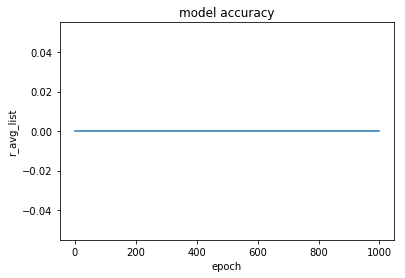

In [19]:
# list all data in history

# summarize history for accuracy
plt.plot(r_avg_list)

plt.title('model accuracy')
plt.ylabel('r_avg_list')
plt.xlabel('epoch')

plt.show()

In [ ]:
#reward system
(x_train, y_train), (x_test, y_test)=vfl_data(t,100)

In [ ]:
class RewardGiver(object):
    def__init__(self,)

In [ ]:
p_propability = model.predict(p) # % propaability
p_class=model.predict_classes(p)  # class 1 or 0 based on properbility

In [ ]:
Aarr=y_test[-begin:-end].astype('int').reshape(p.shape[0],1)
Parr=p_class.reshape(p.shape[0],1)
rsp=np.hstack((Parr,Aarr))


In [ ]:
g_env.r_action(1)

In [ ]:
g_env.reset()